In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.jit as jit
import torchvision.models as models

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

# Define a transform to preprocess the data (you can customize this)
transform = transforms.Compose([transforms.ToTensor()])

In [63]:
# Download and load the Fashion MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Create data loaders to work with the data in batches
train_loader_MINST = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_MINST = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [64]:
# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# Create data loaders
train_loader_CIFAR = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_CIFAR = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)


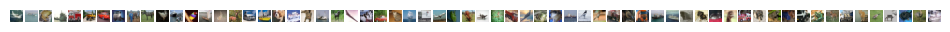

In [65]:

data_iter = iter(train_loader_CIFAR)
images, labels = next(data_iter)

class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
for i, image in enumerate(images):
 
    image = image.numpy()

    print(image.shape)
    image = image.transpose((1, 2, 0))

    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


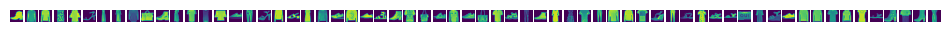

In [66]:
data_iter = iter(train_loader_MINST)
images, labels = next(data_iter)

class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
for i, image in enumerate(images):
 
    image = image.numpy()
    print(image.shape)
    image = image.transpose((1, 2, 0))

    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

In [67]:
class CNN_CIFAR(nn.Module):

    def __init__(self):

        super(CNN_CIFAR, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32 * 8 * 8, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  

    def forward(self, x):

        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

            

In [68]:
class CNN_MINST(nn.Module):

    def __init__(self):

        super(CNN_MINST, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  

    def forward(self, x):

        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [112]:
class FNN_CIFAR(nn.Module):

    def __init__(self):

        super(FNN_CIFAR, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=3072, out_features = 256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
    

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)

        return x

CIFAR CNN

In [116]:

model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()

In [125]:
num_epochs_CIFAR = 100

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")

Epoch [1/100] Loss: 2.1529924869537354
Epoch [2/100] Loss: 2.254504680633545
Epoch [3/100] Loss: 1.9645130634307861


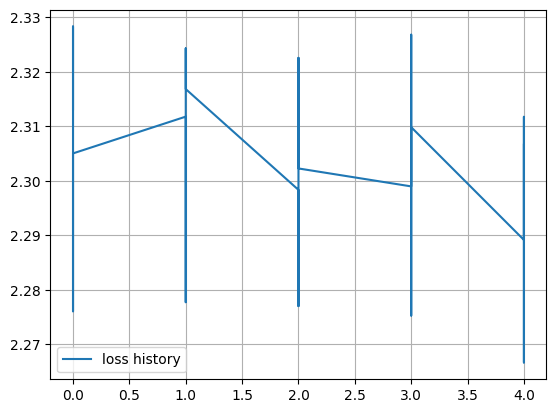

In [118]:
loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.legend()
plt.grid()
plt.show()

CIFAR MOMENTUM + ADAM

In [70]:
loss_final = []

model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR, momentum = 0)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()


In [71]:
model_MINST = CNN_MINST()

lr_MINST = 0.0005
model_parameters_MINST = model_MINST.parameters()
optimizer_MINST = optim.SGD(model_parameters_MINST, lr_MINST)
data_MINST = train_loader_MINST
loss_function_MINST = nn.CrossEntropyLoss()

In [72]:
num_epochs_CIFAR = 10

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")



Epoch [1/10] Loss: 2.3041019439697266
Epoch [2/10] Loss: 2.299854040145874
Epoch [3/10] Loss: 2.3031725883483887
Epoch [4/10] Loss: 2.3041512966156006
Epoch [5/10] Loss: 2.289351224899292
Epoch [6/10] Loss: 2.2931487560272217
Epoch [7/10] Loss: 2.32965087890625
Epoch [8/10] Loss: 2.2956702709198
Epoch [9/10] Loss: 2.2388744354248047
Epoch [10/10] Loss: 2.20218563079834
Training completed.


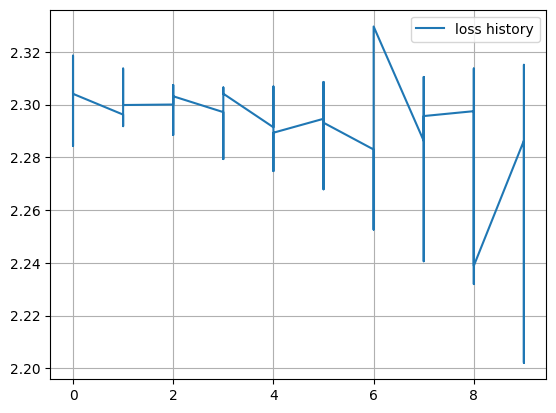

In [73]:
loss_final.append(loss)

loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.legend()
plt.grid()
plt.show()

In [74]:
model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR, momentum = 0.1)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()

Epoch [1/10] Loss: 2.037076473236084
Epoch [2/10] Loss: 1.9338144063949585
Epoch [3/10] Loss: 2.2569501399993896
Epoch [4/10] Loss: 1.975176215171814
Epoch [5/10] Loss: 1.9174871444702148
Epoch [6/10] Loss: 2.1074905395507812
Epoch [7/10] Loss: 2.0885884761810303
Epoch [8/10] Loss: 1.9882577657699585
Epoch [9/10] Loss: 1.8589845895767212
Epoch [10/10] Loss: 1.853613018989563
Training completed.


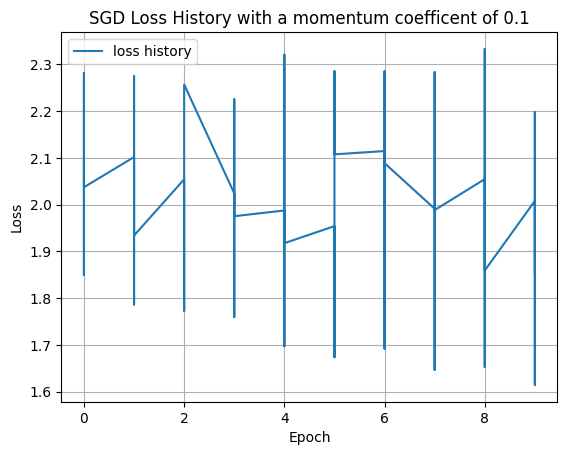

In [124]:
num_epochs_CIFAR = 10

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")

loss_final.append(loss)

loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD Loss History with a momentum coefficent of 0.1")
plt.grid()
plt.show()

In [76]:
model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR, momentum = 0.2)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()

Epoch [1/10] Loss: 2.3166491985321045
Epoch [2/10] Loss: 2.31719708442688
Epoch [3/10] Loss: 2.3055148124694824
Epoch [4/10] Loss: 2.298832416534424
Epoch [5/10] Loss: 2.3026278018951416
Epoch [6/10] Loss: 2.288031816482544
Epoch [7/10] Loss: 2.299241781234741
Epoch [8/10] Loss: 2.258833646774292
Epoch [9/10] Loss: 2.2894463539123535
Epoch [10/10] Loss: 2.303645610809326
Training completed.


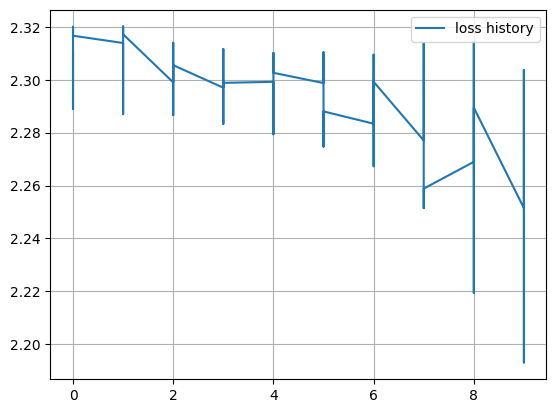

In [77]:
num_epochs_CIFAR = 10

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")

loss_final.append(loss)

loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.legend()
plt.grid()
plt.show()

In [78]:
model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR, momentum = 0.3)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()

Epoch [1/10] Loss: 2.2995781898498535
Epoch [2/10] Loss: 2.3140132427215576
Epoch [3/10] Loss: 2.2889742851257324
Epoch [4/10] Loss: 2.2851970195770264
Epoch [5/10] Loss: 2.250851631164551
Epoch [6/10] Loss: 2.1794545650482178
Epoch [7/10] Loss: 2.153355360031128
Epoch [8/10] Loss: 2.0648372173309326
Epoch [9/10] Loss: 2.1886117458343506
Epoch [10/10] Loss: 2.2497639656066895
Training completed.


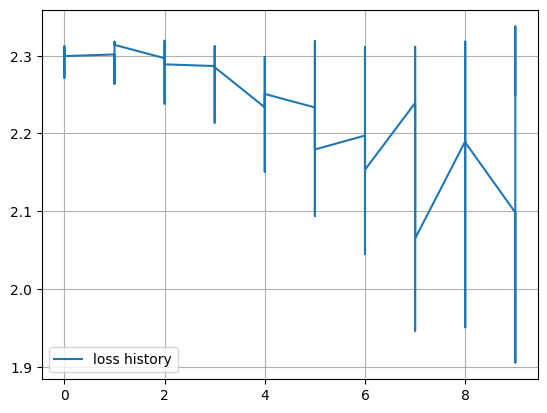

In [79]:
num_epochs_CIFAR = 10

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")

loss_final.append(loss)

loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.legend()
plt.grid()
plt.show()

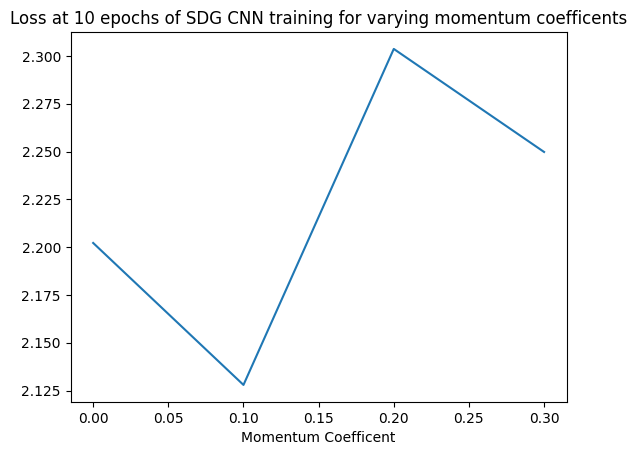

In [80]:
numpy_loss_final = []

for i in loss_final:

    numpy_loss_final.append(i.detach().numpy())

momentum_list = [0, 0.1, 0.2, 0.3]
plt.plot(momentum_list, numpy_loss_final)
plt.xlabel("Momentum Coefficent")
plt.title("Loss at 10 epochs of SDG CNN training for varying momentum coefficents")

plt.show()

In [81]:
model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.0005
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.Adam(model_parameters_CIFAR, lr_CIFAR, betas = (0.2, 0.5))
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()

In [122]:
num_epochs_CIFAR = 10

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")



Epoch [1/10] Loss: 2.2905547618865967
Epoch [2/10] Loss: 2.2632617950439453
Epoch [3/10] Loss: 2.30374813079834
Epoch [4/10] Loss: 2.2779712677001953
Epoch [5/10] Loss: 2.3414485454559326
Epoch [6/10] Loss: 2.23218035697937
Epoch [7/10] Loss: 2.205066442489624
Epoch [8/10] Loss: 2.3185577392578125
Epoch [9/10] Loss: 2.2578024864196777
Epoch [10/10] Loss: 2.126249074935913
Training completed.


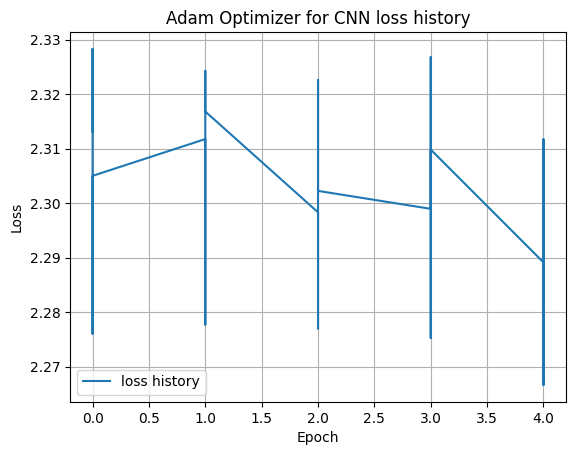

NameError: name 'accuracy' is not defined

In [121]:
loss_final.append(loss)

loss_numpy_CIFAR = []

for i in loss_list_CIFAR:

    loss_numpy_CIFAR.append(i.detach().numpy())

plt.plot(epoch_list_CIFAR, loss_numpy_CIFAR, label = "loss history")
plt.title("Adam Optimizer for CNN loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

acc = []

for validation_img, validation_labels in test_loader_CIFAR:

    pred_test = model_CIFAR(validation_img)
    acc += accuracy(pred_test, validation_labels)

print(acc.mean())

In [84]:
num_epochs_MINST = 100

loss_list_MINST = []
epoch_list_MINST = []

for epoch in range(num_epochs_MINST):
    for batch_data, batch_labels in train_loader_MINST:
        optimizer_MINST.zero_grad()
        outputs = model_MINST(batch_data)

        loss = loss_function_MINST(outputs, batch_labels)

        loss_list_MINST.append(loss)
        epoch_list_MINST.append(epoch)

        loss.backward()
        optimizer_MINST.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_MINST}] Loss: {loss.item()}')

print("Training completed.")

plt.plot(epoch_list_MINST, loss_list_MINST, label = "loss history")
plt.lengend()
plt.grid()
plt.show()

Epoch [1/100] Loss: 2.286769390106201
Epoch [2/100] Loss: 2.2661566734313965
Epoch [3/100] Loss: 2.222490072250366
Epoch [4/100] Loss: 2.064124345779419
Epoch [5/100] Loss: 1.3176506757736206
Epoch [6/100] Loss: 1.1622564792633057
Epoch [7/100] Loss: 0.9403576850891113
Epoch [8/100] Loss: 0.7550191879272461
Epoch [9/100] Loss: 0.7702584862709045
Epoch [10/100] Loss: 0.7774996161460876
Epoch [11/100] Loss: 0.5724461078643799
Epoch [12/100] Loss: 0.6637986302375793
Epoch [13/100] Loss: 0.8446789383888245
Epoch [14/100] Loss: 0.6903297901153564
Epoch [15/100] Loss: 0.5397286415100098
Epoch [16/100] Loss: 0.6967980265617371
Epoch [17/100] Loss: 0.7211507558822632
Epoch [18/100] Loss: 0.7840778827667236
Epoch [19/100] Loss: 0.6943962574005127
Epoch [20/100] Loss: 0.4959486722946167
Epoch [21/100] Loss: 0.6916683316230774
Epoch [22/100] Loss: 0.572454035282135
Epoch [23/100] Loss: 0.7392393946647644
Epoch [24/100] Loss: 0.6581767797470093
Epoch [25/100] Loss: 0.7271165251731873
Epoch [26/100

KeyboardInterrupt: 

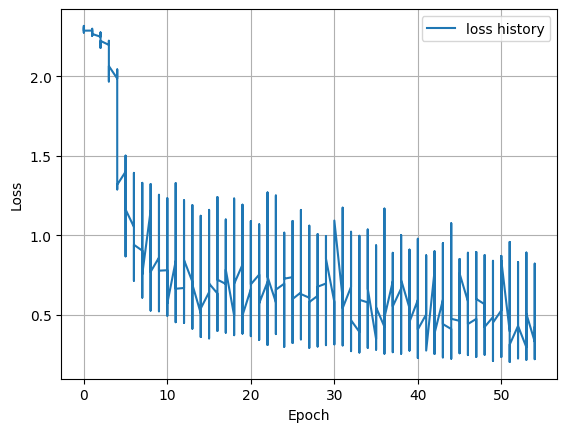

In [85]:
loss_numpy_MINST = []

for i in loss_list_MINST:

    loss_numpy_MINST.append(i.detach().numpy())

plt.plot(epoch_list_MINST, loss_numpy_MINST, label = "loss history")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [113]:
model_CIFAR_FNN = FNN_CIFAR()

lr_CIFAR_FNN = 0.0005
model_parameters_CIFAR_FNN = model_CIFAR_FNN.parameters()
optimizer_CIFAR_FNN = optim.SGD(model_parameters_CIFAR_FNN, lr_CIFAR)
data_CIFAR_FNN = train_loader_CIFAR
loss_function_CIFAR_FNN = nn.CrossEntropyLoss()

In [115]:
num_epochs_CIFAR_FNN = 100

loss_list_CIFAR_FNN = []
epoch_list_CIFAR_FNN = []

for epoch in range(num_epochs_CIFAR_FNN):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR_FNN.zero_grad()
        outputs = model_CIFAR_FNN(batch_data)
        loss = loss_function_CIFAR_FNN(outputs, batch_labels)

        loss_list_CIFAR_FNN.append(loss)
        epoch_list_CIFAR_FNN.append(epoch)

        loss.backward()
        optimizer_CIFAR_FNN.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x256 and 3072x256)

In [ ]:
loss_numpy_FNN_MINST = []

for i in loss_list_MINST_FNN:

    loss_numpy_FNN_MINST.append(i.detach().numpy())

plt.plot(epoch_list_MINST, loss_numpy_FNN_MINST, label = "loss history")
plt.legend()
plt.grid()
plt.show()

NameError: name 'loss_list_MINST_FNN' is not defined